In [1]:
!pip uninstall statsmodels --y && pip install statsmodels==0.11.1
!pip install scipy==1.4.1
!pip install pmdarima==1.8.5
#!pip install pmdarima

!pip install armagarch

!pip install arch


Found existing installation: statsmodels 0.10.2
Uninstalling statsmodels-0.10.2:
  Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 8.7 MB 7.3 MB/s 
     |████████████████████████████████| 1.4 MB 7.6 MB/s 
     |████████████████████████████████| 902 kB 7.7 MB/s 


In [2]:
import math
import matplotlib.pyplot as plt
import keras 
import pandas as pd

import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from keras.models import load_model


from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
import numpy
from numpy import concatenate

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams

from pmdarima.arima import auto_arima

import armagarch as ag

from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm
import statsmodels.api as sm


In [4]:
dfa = pd.read_csv("GOOG.csv")
dfb = pd.read_csv("MSFT.csv")


In [5]:
dft = pd.read_csv("AMZN.csv")
dfa,dfb,dft,

(            Date         Open         High          Low        Close  \
 0       2015/1/2   527.561584   529.815369   522.665039   523.373108   
 1       2015/1/5   521.827332   522.894409   511.655243   512.463013   
 2       2015/1/6   513.589966   514.761719   499.678131   500.585632   
 3       2015/1/7   505.611847   505.855164   498.281952   499.727997   
 4       2015/1/8   496.626526   502.101471   489.655640   501.303680   
 ...          ...          ...          ...          ...          ...   
 1498  2020/12/14  1775.000000  1797.390015  1757.214966  1760.060059   
 1499  2020/12/15  1764.420044  1771.420044  1749.949951  1767.770020   
 1500  2020/12/16  1772.880005  1773.000000  1756.079956  1763.000000   
 1501  2020/12/17  1768.510010  1771.784058  1738.660034  1747.900024   
 1502  2020/12/18  1754.180054  1755.109985  1720.219971  1731.010010   
 
         Adj Close   Volume  
 0      523.373108  1447563  
 1      512.463013  2059840  
 2      500.585632  2899940  
 3

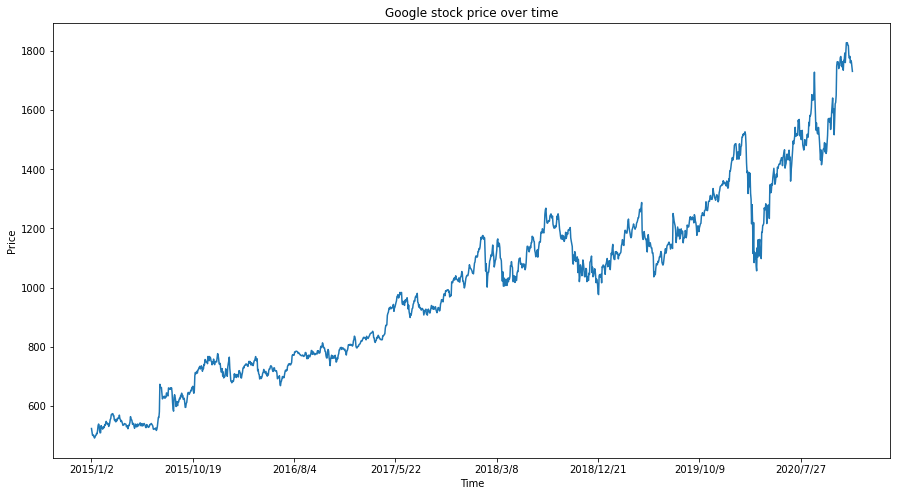

In [6]:
plt.figure(figsize=(15,8))
plt.plot(dfa["Date"], dfa["Close"])
plt.xticks(np.arange(0,1500, 200), dfa['Date'][0:1500:200])
plt.title("Google stock price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.savefig("Google Stock Price.jpg")
plt.show()


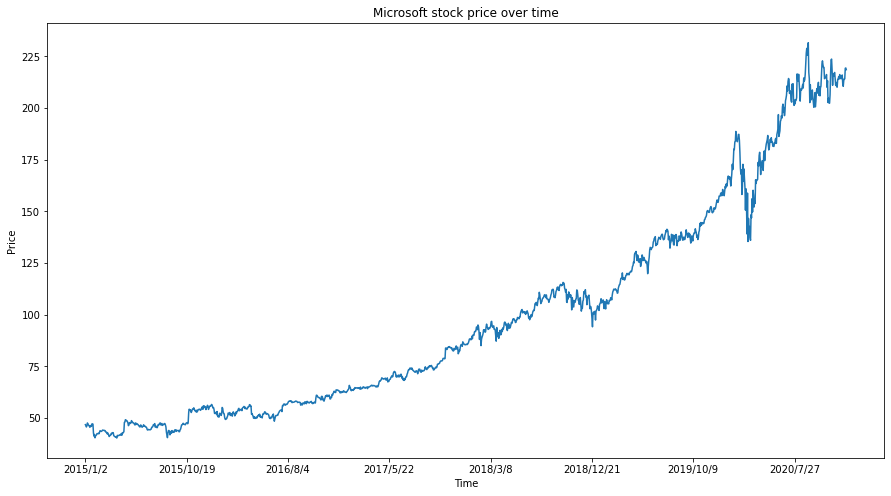

In [7]:
plt.figure(figsize=(15,8))
plt.plot(dfb["Date"], dfb["Close"])
plt.xticks(np.arange(0,1500, 200), dfb['Date'][0:1500:200])
plt.title("Microsoft stock price over time")
plt.xlabel("Time")
plt.ylabel("Price")

plt.savefig("Microsoft Stock Price.jpg")
plt.show()

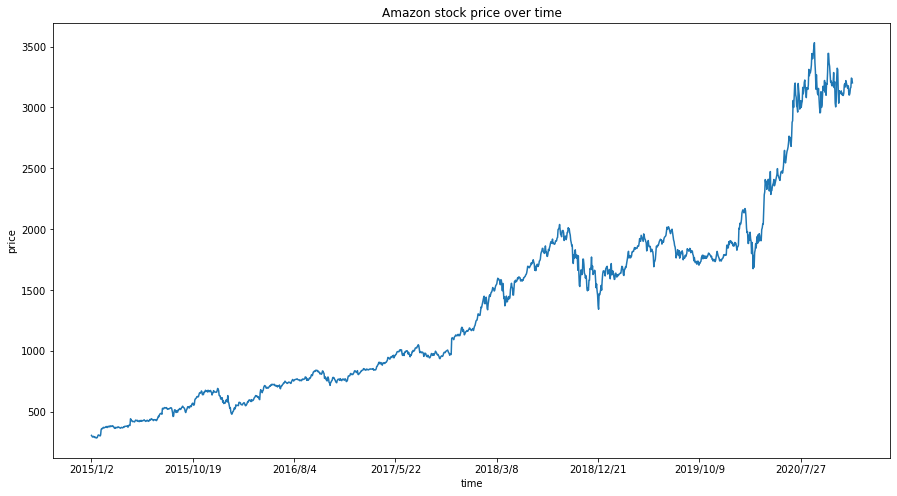

In [8]:
plt.figure(figsize=(15,8))
plt.plot(dft["Date"], dft["Close"])
plt.xticks(np.arange(0,1500, 200), dft['Date'][0:1500:200])
plt.title("Amazon stock price over time")
plt.xlabel("time")
plt.ylabel("price")

plt.savefig("Amazon Stock Price.jpg")
plt.show()


In [9]:
X_train_a = dfa[:1052]['Close'].values
X_test_a = dfa[1052:]['Close'].values

X_train_b = dfb[:1052]['Close'].values
X_test_b = dfb[1052:]['Close'].values




In [10]:
X_train_t = dft[:1052]['Close'].values
X_test_t = dft[1052:]['Close'].values

Google, Microsoft, Amazon Non Rolling ARIMA

In [11]:
model_a = auto_arima(X_train_a, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8390.690, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8392.353, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8392.314, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8390.819, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8391.088, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 3.431 seconds


In [12]:
model_b = auto_arima(X_train_b, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3211.820, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3244.691, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3230.268, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3226.459, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3245.712, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3220.243, Time=0.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3219.530, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3216.840, Time=2.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3208.717, Time=1.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3222.161, Time=0.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3201.937, Time=2.73 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3203.379, Time=3.00 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=3203.401, Time=3.33 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3210.595, Time=5.96 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

In [13]:
model_t = auto_arima(X_train_t, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9442.646, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9443.933, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9443.874, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9444.161, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9441.964, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9443.875, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9443.873, Time=1.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9444.294, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9444.454, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9445.368, Time=0.18 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.544 seconds


Google Rolling ARIMA

In [14]:
train_data, test_data = dfa[0:int(len(dfa)*0.7)], dfa[int(len(dfa)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
len(history)

1052

In [15]:
import statsmodels.api as sm
model_predictions = []

N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(0,1,0))
    model_fit=model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
RMSE = sqrt(mean_squared_error(test_data, model_predictions))
ABSE = mean_absolute_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 27.154631236955083
Testing Mean Absolute Error is 18.2994671751663


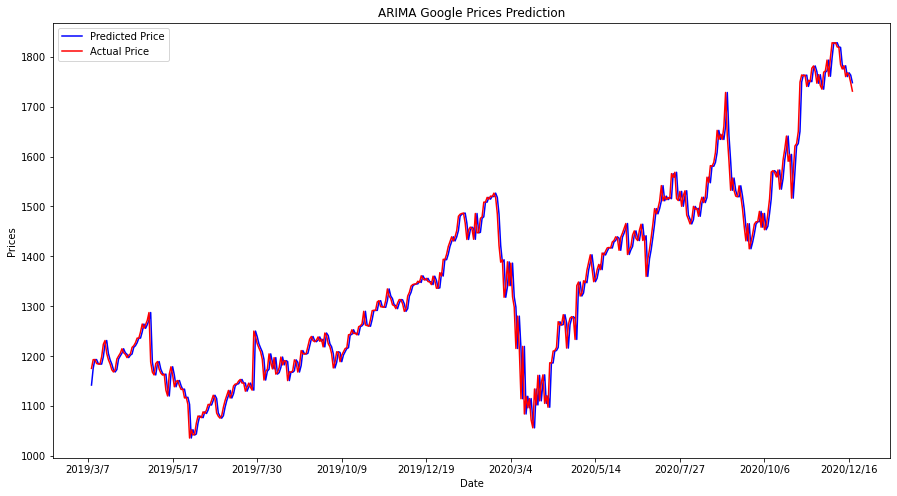

In [16]:
test_set_range = dfa[int(len(dfa)*0.7):].index
plt.figure(figsize=(15,8))
plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('ARIMA Google Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1050,1503,50), dfa.Date[1050:1503:50])
plt.legend()

plt.savefig("ARIMA Price Google")
plt.show()

Amazon ARIMA

In [17]:
train_data, test_data = dft[0:int(len(dft)*0.7)], dft[int(len(dft)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
len(history)

1052

In [18]:
model_predictions = []

N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(1,1,1))
    model_fit=model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
RMSE = sqrt(mean_squared_error(test_data, model_predictions))
ABSE = mean_absolute_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing Root Mean Squared Error is 49.53411960254809
Testing Mean Absolute Error is 33.85865268130971


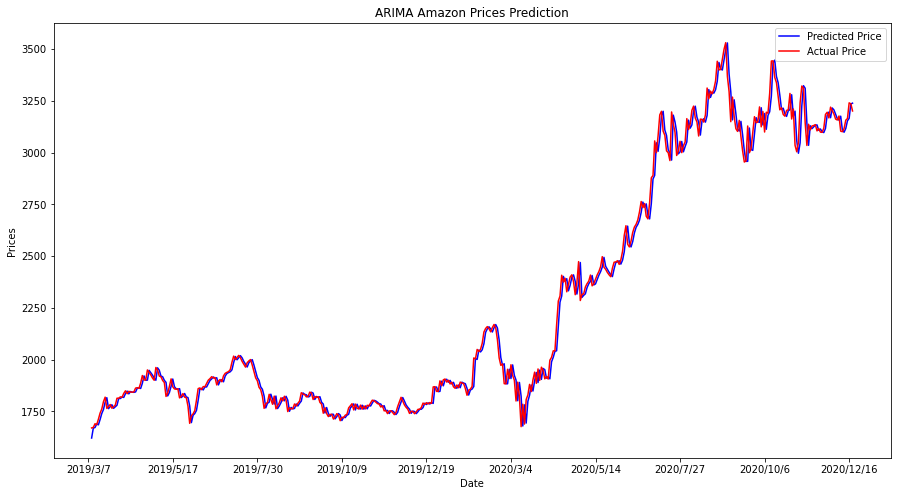

In [19]:
test_set_range = dft[int(len(dft)*0.7):].index
plt.figure(figsize=(15,8))
plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('ARIMA Amazon Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1050,1503,50), dft.Date[1050:1503:50])
plt.legend()
plt.savefig("ARIMA Price Amazon")
plt.show()

Microsoft ARIMA

In [20]:
train_data, test_data = dfb[0:int(len(dfb)*0.7)], dfb[int(len(dfb)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
len(history)

1052

In [21]:
model_predictions = []

N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(3,1,3))
    model_fit=model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
RMSE = sqrt(mean_squared_error(test_data, model_predictions))
ABSE = mean_absolute_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimiza

Testing Root Mean Squared Error is 3.6733909731811796
Testing Mean Absolute Error is 2.4305938328391297


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


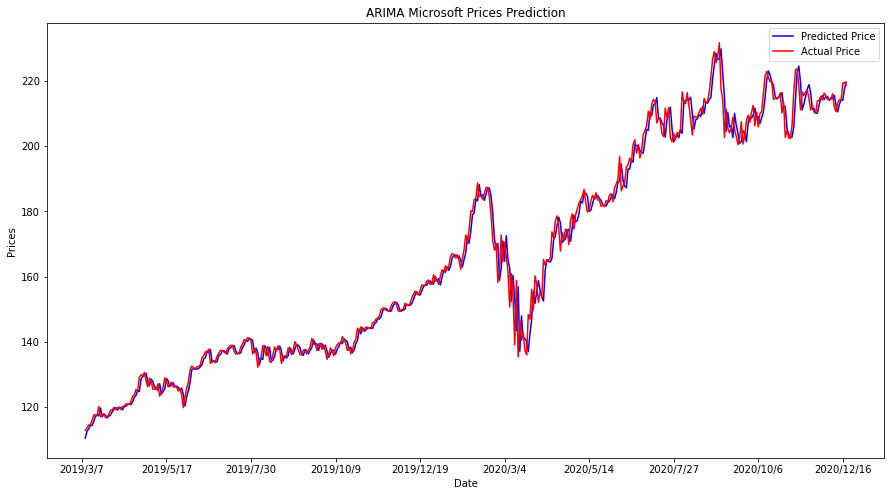

In [23]:
test_set_range = dfb[int(len(dfb)*0.7):].index
plt.figure(figsize=(15,8))
plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('ARIMA Microsoft Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1050,1503,50), dfa.Date[1050:1503:50])
plt.legend()
plt.savefig("ARIMA Microsoft Prices Prediction")
plt.show()

Google ARMA GARCH

In [24]:
from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [25]:


def returns_predict(period):
    np.random.seed(100)
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool









In [26]:
from statsmodels.tsa.arima_model import ARMA


train_data, test_data = dfa[0:1052], dfa[1052:]
returns = pd.DataFrame(np.log(train_data['Close']).diff().dropna())
returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)
arma_mod01 = ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]

test_returns = pd.DataFrame(np.log(test_data['Close']).diff().dropna())

test_returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)

test_returns['Close'] = test_data['Close']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000225. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [27]:
pred = returns_predict(451)

In [28]:
train_data.iloc[1051,4:5]

Close    1142.319946
Name: 1051, dtype: object

In [29]:
last_val = math.log(train_data.iloc[1051,4:5])
last_val
first_value = last_val+pred[0]
log_return = [first_value]
for i in range(1,len(pred)):
  next_value=log_return[i-1]+pred[i]
  log_return.append(next_value)

predicted_price = np.exp(log_return)

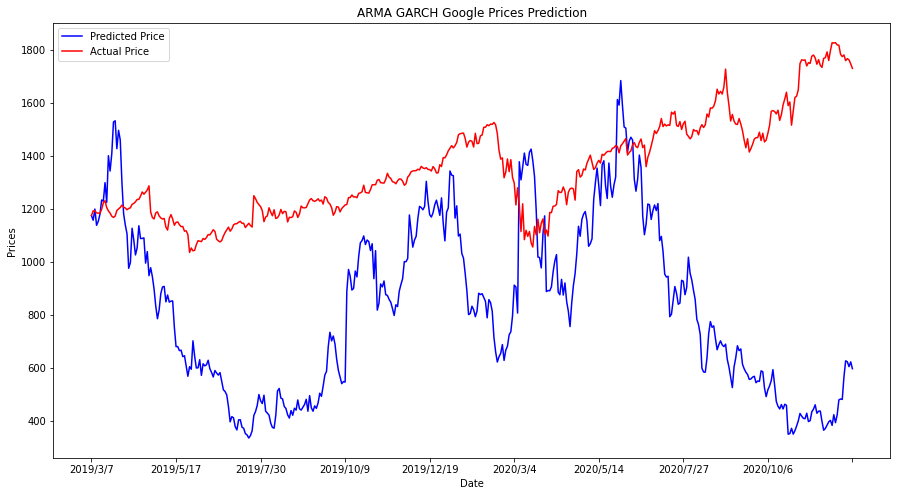

In [30]:
x = dfa.loc[1052: , "Date"] 
x.shape
y =  dfa.iloc[1052: , 4:5].values.reshape(451,) 

plt.figure(figsize=(15,8))
plt.plot(x, predicted_price, color='blue',label='Predicted Price')
plt.plot(x, y, color='red', label='Actual Price')
plt.title('ARMA GARCH Google Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500,50), dfa.Date[1050:1500:50])
plt.legend()
plt.savefig("ARMA GARCH Google Prices Prediction")
plt.show()


In [31]:
RMSE = sqrt(mean_squared_error(y, predicted_price))
ABSE = mean_absolute_error(y, predicted_price)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 654.9645367804098
Testing Mean Absolute Error is 546.2993813569279


Microsoft ARMA GARCH

In [32]:
train_data, test_data = dfb[0:1052], dfb[1052:]
returns = pd.DataFrame(np.log(train_data['Close']).diff().dropna())
returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002296. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [33]:
test_returns = pd.DataFrame(np.log(test_data['Close']).diff().dropna())

test_returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)

test_returns['Close'] = test_data['Close']
pred = returns_predict(451)

In [34]:
last_val = math.log(train_data.iloc[1051,4:5])
last_val
first_value = last_val+pred[0]
log_return = [first_value]
for i in range(1,len(pred)):
  next_value=log_return[i-1]+pred[i]
  log_return.append(next_value)

predicted_price = np.exp(log_return)

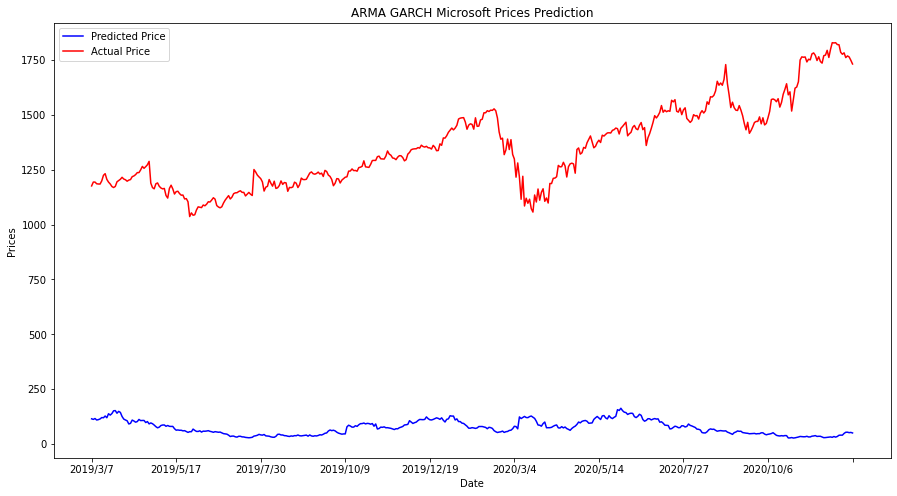

In [35]:
x = dfa.loc[1052: , "Date"] 
y =  dfa.iloc[1052: , 4:5].values.reshape(451,) 

plt.figure(figsize=(15,8))
plt.plot(x, predicted_price, color='blue',label='Predicted Price')
plt.plot(x, y, color='red', label='Actual Price')
plt.title('ARMA GARCH Microsoft Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500,50), dfa.Date[1050:1500:50])
plt.legend()
plt.savefig('ARMA GARCH Microsoft Prices Prediction')
plt.show()

In [36]:
RMSE = sqrt(mean_squared_error(y, predicted_price))
ABSE = mean_absolute_error(y, predicted_price)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 1291.80505989719
Testing Mean Absolute Error is 1276.608223849383


Amazon ARMA GARCH

In [62]:
train_data, test_data = dft[0:1052], dft[1052:]
returns = pd.DataFrame(np.log(train_data['Close']).diff().dropna())
returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003666. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [63]:
test_returns = pd.DataFrame(np.log(test_data['Close']).diff().dropna())

test_returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)

test_returns['Close'] = test_data['Close']
pred = returns_predict(451)

In [64]:
last_val = math.log(train_data.iloc[1051,4:5])
last_val
first_value = last_val+pred[0]
log_return = [first_value]
for i in range(1,len(pred)):
  next_value=log_return[i-1]+pred[i]
  log_return.append(next_value)

predicted_price = np.exp(log_return)

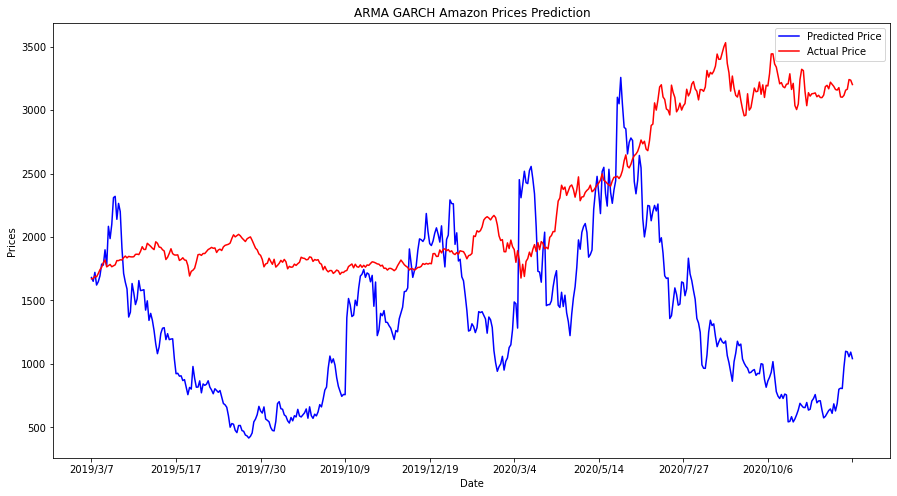

In [65]:
x = dft.loc[1052: , "Date"] 
y =  dft.iloc[1052: , 4:5].values.reshape(451,) 

plt.figure(figsize=(15,8))
plt.plot(x, predicted_price, color='blue',label='Predicted Price')
plt.plot(x, y, color='red', label='Actual Price')
plt.title('ARMA GARCH Amazon Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500,50), dfa.Date[1050:1500:50])
plt.legend()
plt.savefig('ARMA GARCH Amazon Prices Prediction')
plt.show()

In [66]:
RMSE = sqrt(mean_squared_error(y, predicted_price))
ABSE = mean_absolute_error(y, predicted_price)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 1284.6107183298072
Testing Mean Absolute Error is 1021.6112248086799


Moving Average (1, 60) Model

In [42]:
sma_1 = dfa.iloc[1199:-1, 4:5].rolling(1).mean().values


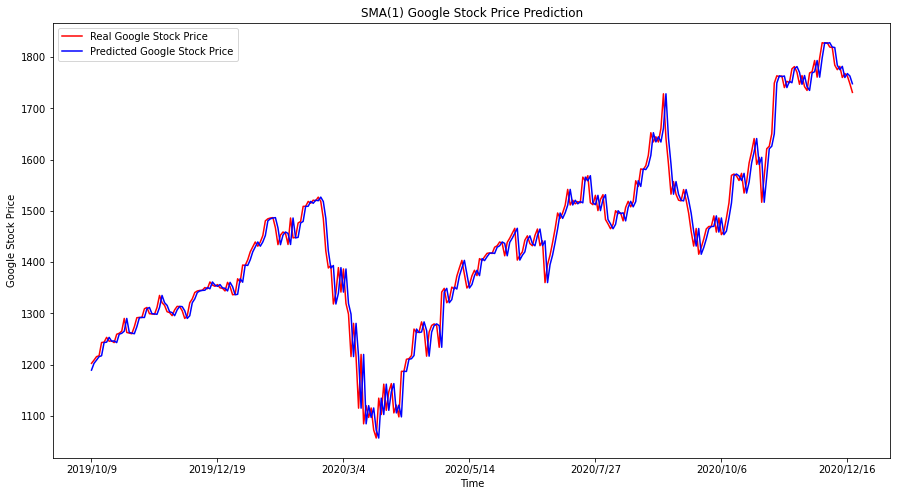

In [43]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(dfa.loc[1200:, "Date"],sma_1, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(1) Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.savefig('SMA(1) Google Stock Price Prediction')
plt.show() 

In [44]:
abse = mean_absolute_error(sma_1, y)
rmse = math.sqrt(mean_squared_error(sma_1,y))

print(abse,rmse)

20.85996359405941 30.065436870065678


In [45]:
sma_60 = dfa.iloc[1199:-1, 4:5].rolling(60).mean().values


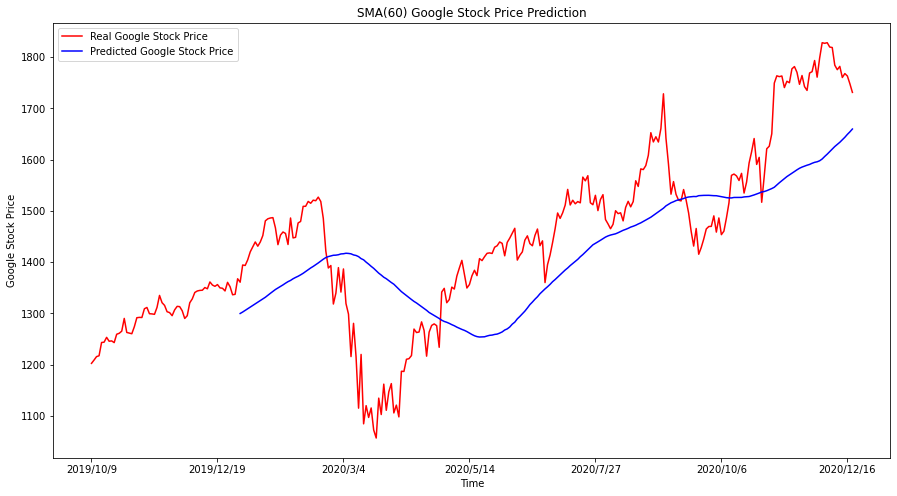

In [46]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(dfa.loc[1200:, "Date"],sma_60, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(60) Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.savefig('SMA(60) Google Stock Price Prediction')
plt.show() 

In [47]:
abse = mean_absolute_error(sma_60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(sma_60[60:],y[60:]))

print(abse,rmse)

114.61170889170094 132.76344042695675


Exponential Moving Average

In [48]:
ema60 = dfa.iloc[1199:-1, 4:5].ewm(span=60).mean().values

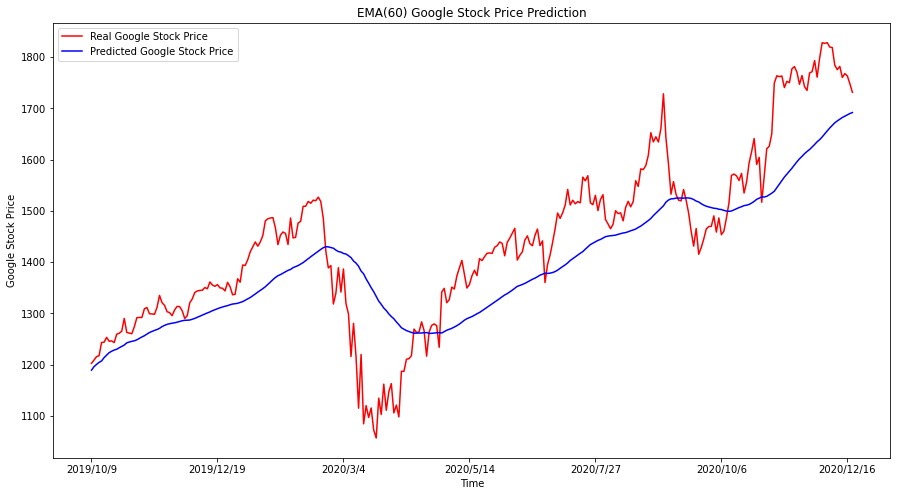

In [49]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(dfa.loc[1200:, "Date"],ema60, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(60) Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.savefig('EMA(60) Google Stock Price Prediction')
plt.show() 

In [50]:
abse = mean_absolute_error(ema60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(ema60[60:],y[60:]))

print(abse,rmse)

94.6628892911474 110.8801547500979


In [51]:
ema1 = dfa.iloc[1199:-1, 4:5].ewm(span=1).mean().values

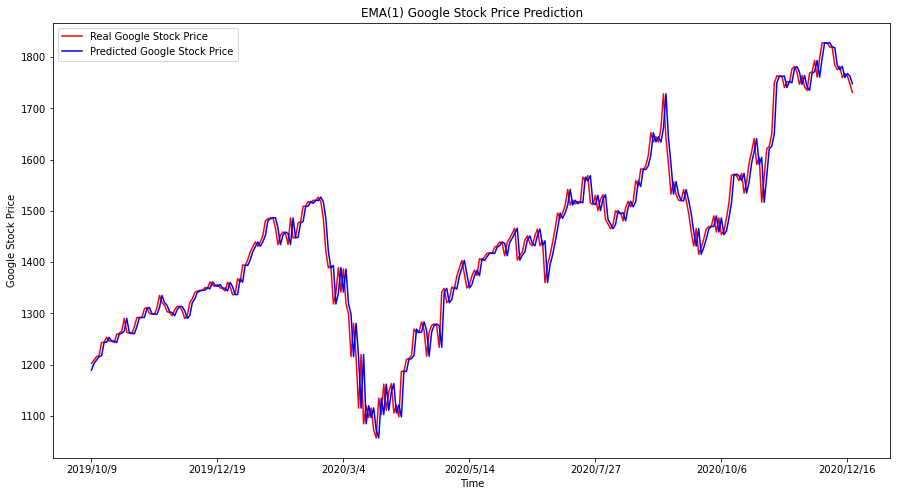

In [52]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Google Stock Price")
plt.plot(dfa.loc[1200:, "Date"],ema1, color = "blue", label = "Predicted Google Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(1) Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.savefig('EMA(1) Google Stock Price Prediction')
plt.show() 

In [53]:
abse = mean_absolute_error(ema1, y)
rmse = math.sqrt(mean_squared_error(ema1,y))

print(abse,rmse)

20.85996359405941 30.065436870065678


Microsoft MA

2.982376607260726 4.383442837919175


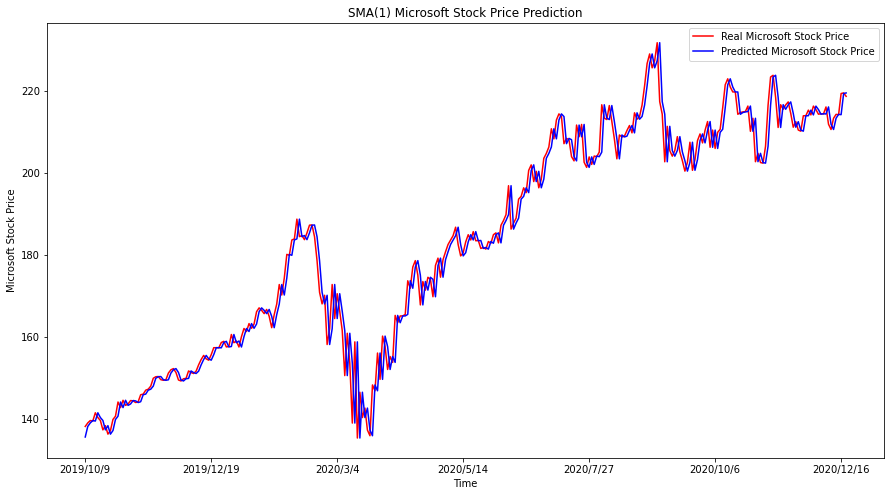

In [54]:
sma_1 = dfb.iloc[1199:-1, 4:5].rolling(1).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
abse = mean_absolute_error(sma_1, y)
rmse = math.sqrt(mean_squared_error(sma_1,y))

print(abse,rmse)
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(dfb.loc[1200:, "Date"],sma_1, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(1) Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.savefig('SMA(1) Microsoft Stock Price Prediction')
plt.show() 

11.798999144650205 14.131191444563289


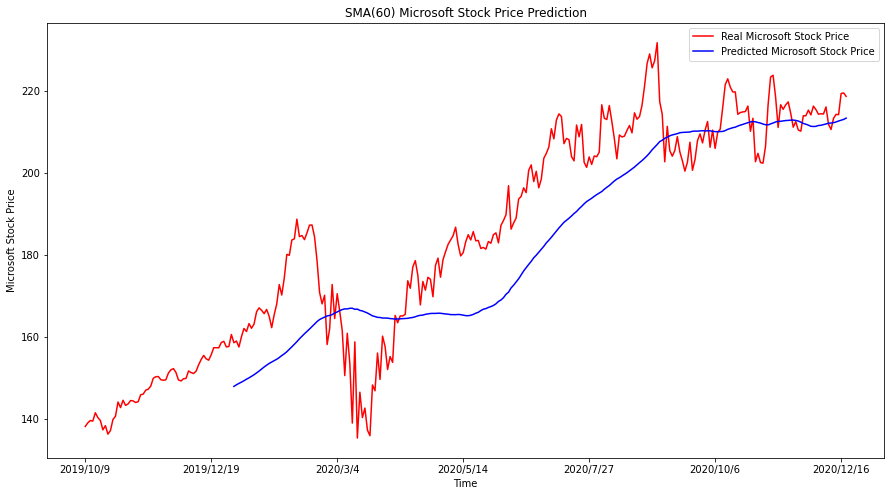

In [55]:
sma_60 = dfb.iloc[1199:-1, 4:5].rolling(60).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,)
abse = mean_absolute_error(sma_60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(sma_60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(dfb.loc[1200:, "Date"],sma_60, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(60) Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.savefig('SMA(60) Microsoft Stock Price Prediction')
plt.show()

10.667709486411743 12.702933488026698


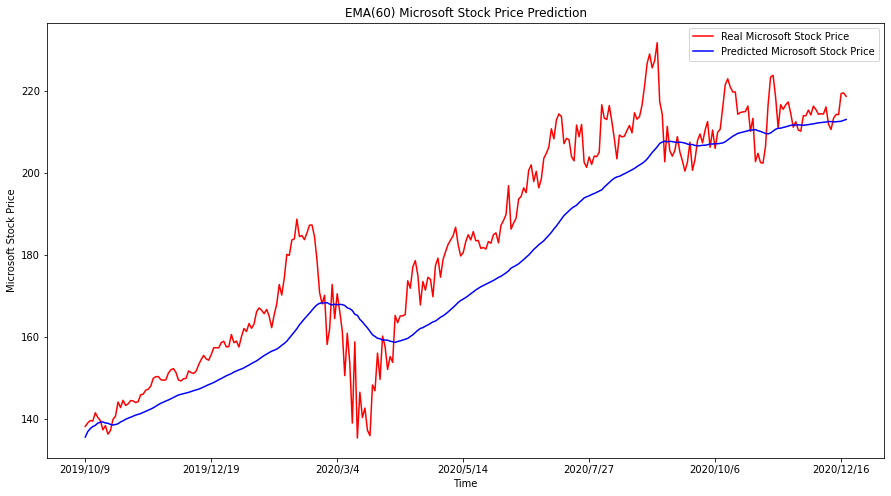

In [56]:
ema60 = dfb.iloc[1199:-1, 4:5].ewm(span=60).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,)
abse = mean_absolute_error(ema60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(ema60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(dfb.loc[1200:, "Date"],ema60, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(60) Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.savefig('EMA(60) Microsoft Stock Price Prediction')
plt.show() 

2.982376607260726 4.383442837919175


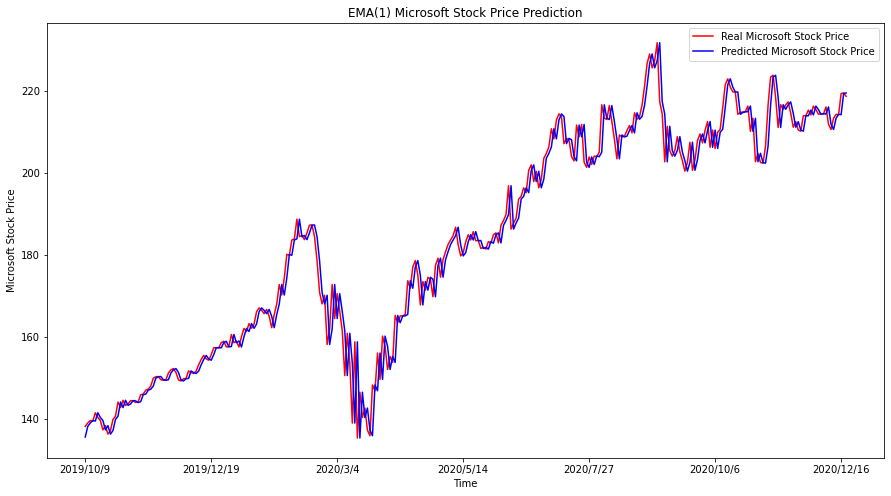

In [57]:
ema1 = dfb.iloc[1199:-1, 4:5].ewm(span=1).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,) 
abse = mean_absolute_error(ema1, y)
rmse = math.sqrt(mean_squared_error(ema1,y))

print(abse,rmse)
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Microsoft Stock Price")
plt.plot(dfb.loc[1200:, "Date"],ema1, color = "blue", label = "Predicted Microsoft Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(1) Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.savefig('EMA(1) Microsoft Stock Price Prediction')
plt.show() 

Amazon MA

41.031353122112215 58.030859507468584


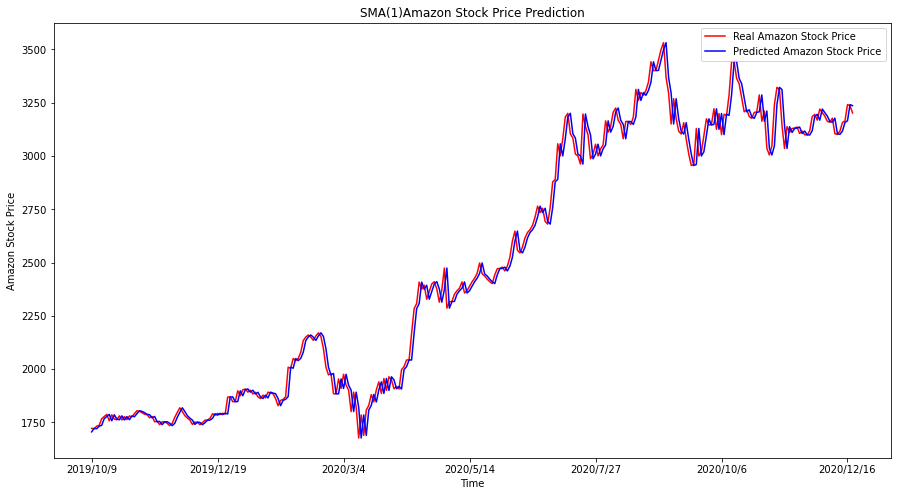

In [58]:
sma_1 = dft.iloc[1199:-1, 4:5].rolling(1).mean().values
x = dft.loc[1200: , "Date"] 
y =  dft.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
abse = mean_absolute_error(sma_1, y)
rmse = math.sqrt(mean_squared_error(sma_1,y))

print(abse,rmse)
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(dft.loc[1200:, "Date"],sma_1, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(1)Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.savefig('SMA(1)Amazon Stock Price Prediction')
plt.show() 

210.2676003489026 265.81385701154454


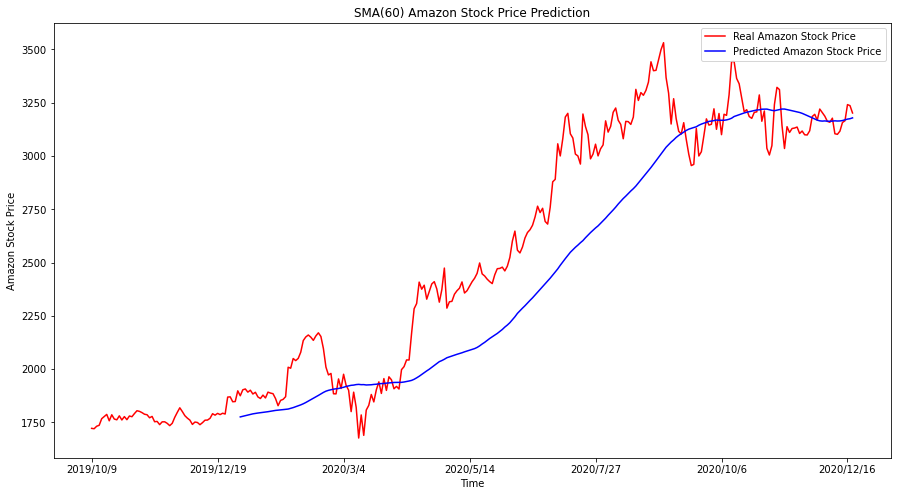

In [59]:
sma_60 = dft.iloc[1199:-1, 4:5].rolling(60).mean().values
x = dft.loc[1200: , "Date"] 
y =  dft.iloc[1200: , 4:5].values.reshape(303,)
abse = mean_absolute_error(sma_60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(sma_60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(dft.loc[1200:, "Date"],sma_60, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(60) Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.savefig('SMA(60) Amazon Stock Price Prediction')
plt.show()

193.96627569955044 246.0902314344878


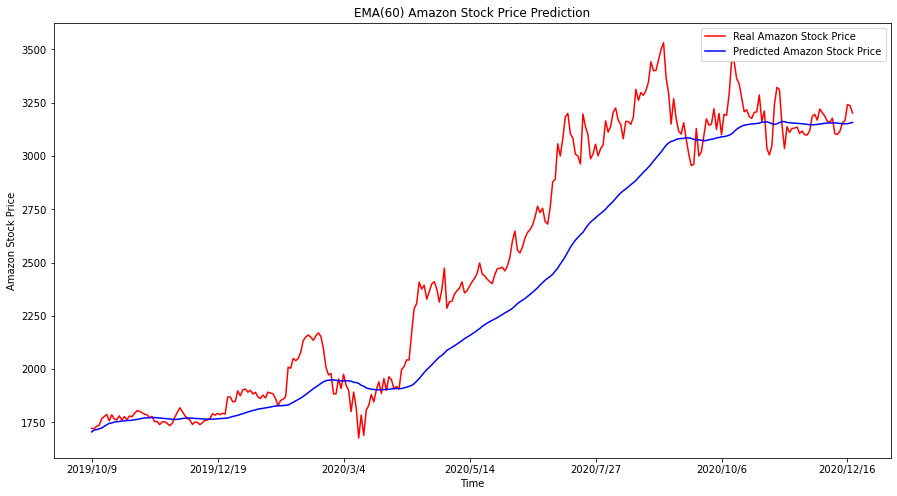

In [60]:
ema60 = dft.iloc[1199:-1, 4:5].ewm(span=60).mean().values
x = dft.loc[1200: , "Date"] 
y =  dft.iloc[1200: , 4:5].values.reshape(303,)
abse = mean_absolute_error(ema60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(ema60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(dft.loc[1200:, "Date"],ema60, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(60) Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.savefig('EMA(60) Amazon Stock Price Prediction')
plt.show()

41.031353122112215 58.030859507468584


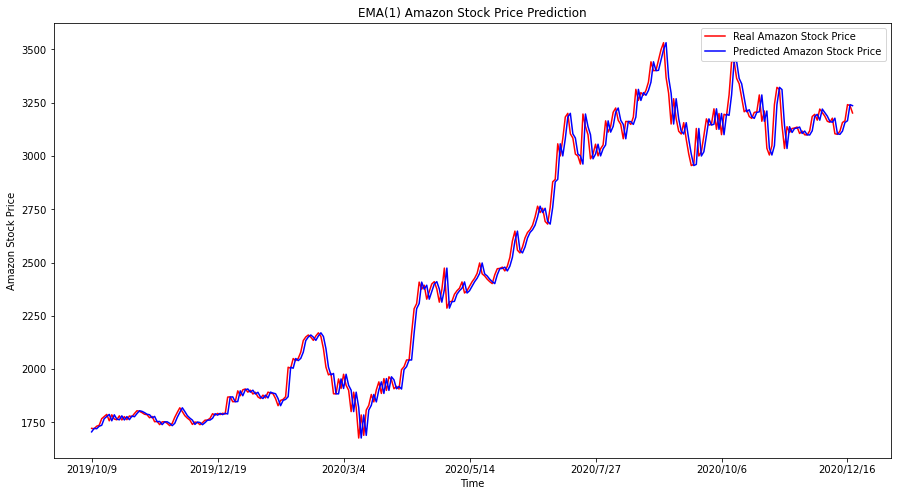

In [61]:
ema1 = dft.iloc[1199:-1, 4:5].ewm(span=1).mean().values
x = dft.loc[1200: , "Date"] 
y =  dft.iloc[1200: , 4:5].values.reshape(303,) 
abse = mean_absolute_error(ema1, y)
rmse = math.sqrt(mean_squared_error(ema1,y))

print(abse,rmse)
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(dft.loc[1200:, "Date"],ema1, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(1) Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.savefig('EMA(1) Amazon Stock Price Prediction')
plt.show() 